# Question to answer:
4. What is the coorelation between number of police station and number of crimes/offence status?
5. What is the trend for number of police status built over time, by regions

# Glossary
#### Charge status ####
The charge status indicates when a charge has been laid by Victoria Police at the time these data were extracted from the LEAP database. CSA output categories for this variable include:

Charges Laid,
No Charges Laid,
Unsolved

In the event that no charges have been recorded the investigation status determines whether the incident is categorised as ‘unsolved’ or ‘no charges laid’. The ‘no charges laid’ category represents all investigation statuses other than ‘unsolved’. Both charge and investigation statuses represent information at a point in time and are subject to change.

#### Investigation status:
indicates how the offences has been dealt with by Victoria Police at the time data was extracted from the LEAP database. This status represents information at a point in time and is subject to change.
CSA output categories include:

Arrest/Summons
Caution/Official warning
Intent to Summons
Other
Unsolved
Other includes: Penalty infringement notice, caution not authorised, complaint withdrawn, notice to appear, no offence disclosed, not authorised, offender processed, warrant issued, summons not authorised, presentment and other statuses.

For more information, please refer to Charge status

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import requests
import json
import numpy as np
from scipy.stats import linregress
import time
# from shapely.geometry import shape, Point

In [3]:
xlsx = pd.ExcelFile("./Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")

# Generate population by LGA and region file

In [4]:
# Reading in external data file to calculate population
table2 = pd.read_excel(xlsx, "Table 02")

# adding a new column- total population
table2["Total Population"] = (table2["Incidents Recorded"] / table2["LGA Rate per 100,000 population"] * 100000).astype(int)
table2


,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987
...,...,...,...,...,...,...,...,...,...,...
50400,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F20 Transport regulation offences,F29 Other transport regulation offences,9,6.005445,6.005445
50401,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F33 Liquor and tobacco licensing offences,6,4.003630,4.003630
50402,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F39 Other government regulatory offences,7,4.670902,4.670902
50403,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F91 Environmental offences,2,1.334543,1.334543


In [7]:
# creating new DataFrame 
population_gb = table2.groupby(["Year","Local Government Area"])

population_df = pd.DataFrame({"Total Population": population_gb["Total Population"].mean().astype(int) })

population_df.reset_index(level=[0,1], inplace=True)

In [10]:
population_df

,Year,Local Government Area,Total Population
0,2012,Alpine,12182
1,2012,Ararat,11399
2,2012,Ballarat,96727
3,2012,Banyule,123583
4,2012,Bass Coast,30811
...,...,...,...
785,2021,Wodonga,43147
786,2021,Wyndham,290654
787,2021,Yarra,100852
788,2021,Yarra Ranges,159102


In [11]:
# Read in worksheet with Police Region and LGA info
police_regions_df = pd.read_excel(xlsx, "Table 01")
police_regions_df

,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population"
0,2021,September,1 North West Metro,Banyule,5666,4310.779038
1,2021,September,1 North West Metro,Brimbank,13161,6488.330843
2,2021,September,1 North West Metro,Darebin,10191,6180.887689
3,2021,September,1 North West Metro,Hobsons Bay,4473,4594.609322
4,2021,September,1 North West Metro,Hume,13396,5455.211528
...,...,...,...,...,...,...
865,2012,September,4 Western,Total,51566,5643.659065
866,2012,September,Justice Institutions and Immigration Facilities,Justice Institutions and Immigration Facilities,801,NaN
867,2012,September,Justice Institutions and Immigration Facilities,Total,801,NaN
868,2012,September,Unincorporated Vic,Unincorporated Vic,106,NaN


In [12]:
police_regions_df =  police_regions_df[["Year","Police Region","Local Government Area"]]

# LGA string has space in front of name, triming..
police_regions_df["Local Government Area"] = police_regions_df["Local Government Area"].str.strip()
police_regions_df

<ipython-input-12-b98f6305b5e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_regions_df["Local Government Area"] = police_regions_df["Local Government Area"].str.strip()


,Year,Police Region,Local Government Area
0,2021,1 North West Metro,Banyule
1,2021,1 North West Metro,Brimbank
2,2021,1 North West Metro,Darebin
3,2021,1 North West Metro,Hobsons Bay
4,2021,1 North West Metro,Hume
...,...,...,...
865,2012,4 Western,Total
866,2012,Justice Institutions and Immigration Facilities,Justice Institutions and Immigration Facilities
867,2012,Justice Institutions and Immigration Facilities,Total
868,2012,Unincorporated Vic,Unincorporated Vic


In [13]:
population_df

,Year,Local Government Area,Total Population
0,2012,Alpine,12182
1,2012,Ararat,11399
2,2012,Ballarat,96727
3,2012,Banyule,123583
4,2012,Bass Coast,30811
...,...,...,...
785,2021,Wodonga,43147
786,2021,Wyndham,290654
787,2021,Yarra,100852
788,2021,Yarra Ranges,159102


In [14]:
population_reg_df = pd.merge(police_regions_df, population_df, how= "right", on= ["Year","Local Government Area"])

population_reg_df

,Year,Police Region,Local Government Area,Total Population
0,2012,2 Eastern,Alpine,12182
1,2012,4 Western,Ararat,11399
2,2012,4 Western,Ballarat,96727
3,2012,1 North West Metro,Banyule,123583
4,2012,2 Eastern,Bass Coast,30811
...,...,...,...,...
785,2021,2 Eastern,Wodonga,43147
786,2021,1 North West Metro,Wyndham,290654
787,2021,1 North West Metro,Yarra,100852
788,2021,2 Eastern,Yarra Ranges,159102


In [22]:
population_reg_df.to_csv("./output_data/Population_by_LGA_Regions_2012-2021.csv")

In [16]:
# merge two dataframes
table5 = pd.read_excel(xlsx, "Table 05")
charge_status_df = pd.merge(population_df, table5 , how = "right", on = ["Year", "Local Government Area"])
charge_status_df

,Year,Local Government Area,Total Population,Year ending,Charge Status,Incidents Recorded
0,2021,Alpine,13098,September,Charges laid,153
1,2021,Alpine,13098,September,No charges laid,111
2,2021,Alpine,13098,September,Unsolved,107
3,2021,Ararat,12004,September,Charges laid,625
4,2021,Ararat,12004,September,No charges laid,250
...,...,...,...,...,...,...
2365,2012,Yarra Ranges,149863,September,No charges laid,841
2366,2012,Yarra Ranges,149863,September,Unsolved,2677
2367,2012,Yarriambiack,7094,September,Charges laid,125
2368,2012,Yarriambiack,7094,September,No charges laid,69


In [19]:
# setting up function to show scatter plot by year
def scatter_plot(df, year, chargetype):
    new_df = df.loc[(df["Charge Status"] == chargetype) & (df["Year"] == year)]
    title = str(f"Total Population vs {chargetype} - {year}")
    new_df.plot("Incidents Recorded", "Total Population", kind = "scatter", xlabel = chargetype, title = title)
                
    (slope, intercept, rvalue, pvalue, stderr) = linregress(new_df["Incidents Recorded"],new_df["Total Population"])
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    x = np.arange(0,new_df["Incidents Recorded"].max(),100)
    y = [slope * x1 + intercept for x1 in x]
    plt.annotate(equation, (new_df["Incidents Recorded"].max()/4*2 , new_df["Total Population"].max()/3), color = "red")
    plt.plot(x, y, color = "red" )
    plt.style.use("Solarize_Light2")
    print(f"r-value is {rvalue}")

for year in charge_status_df["Year"]:

    scatter_plot(charge_status_df, year , "Charges laid")
    a = input("continue")
    plt.clf()

<IPython.core.display.Javascript object>


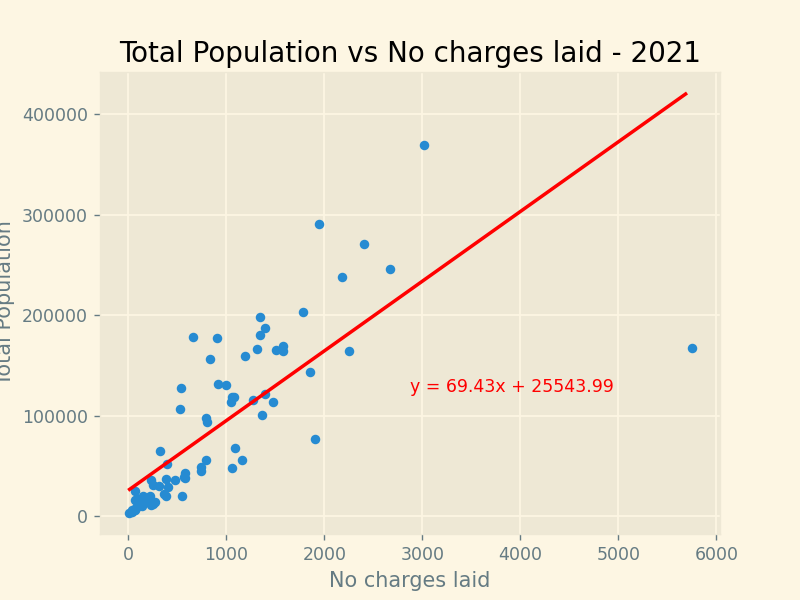

r-value is 0.7696958727213883


In [20]:
scatter_plot(charge_status_df, 2021, "No charges laid")


<IPython.core.display.Javascript object>


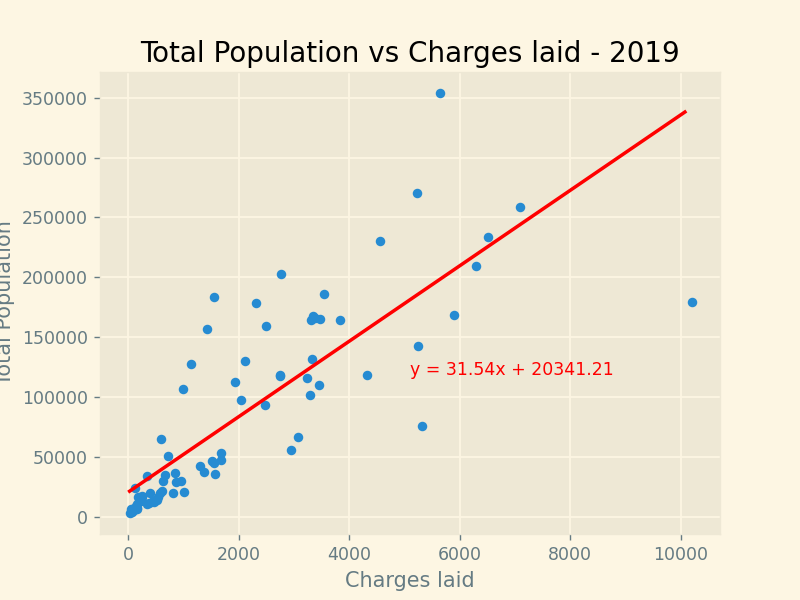

r-value is 0.8153444948963934


In [21]:
scatter_plot(charge_status_df, 2019, "Charges laid")

In [17]:
police_station_df = pd.read_csv("./Data/VMFEAT_POLICE_STATION.csv")

In [18]:
police_station_df.head()

,PFI,FEATURE_ID,PARENT_FEA,FEATURE_TY,FEATURE_SU,FEATURE_ST,NAME,NAME_LABEL,PARENT_NAM,CHILD_EXIS,...,VMADD_PFI,VICNAMES_I,VICNAMES_S,THEME1,THEME2,STATE,CREATE_DAT,SUPERCEDED,CREATE_DA0,OBJECTID
0,134710,134710,NaN,emergency facility,police station,NaN,ALEXANDRA POLICE STATION,Alexandra Police Station,NaN,NaN,...,51913267.0,188,10,NaN,NaN,VIC,"""2009-05-21T00:00:00.000Z""",NaN,"""2021-04-22T00:00:00.000Z""",1887916
1,134827,134827,NaN,emergency facility,police station,NaN,ANGLESEA POLICE STATION,Anglesea Police Station,NaN,NaN,...,53046487.0,392,10,NaN,NaN,VIC,"""2009-05-21T00:00:00.000Z""",NaN,"""2021-04-22T00:00:00.000Z""",1887917
2,134850,134850,NaN,emergency facility,police station,NaN,APOLLO BAY POLICE STATION,Apollo Bay Police Station,NaN,NaN,...,127044959.0,454,10,NaN,NaN,VIC,"""2009-05-21T00:00:00.000Z""",NaN,"""2021-04-22T00:00:00.000Z""",1887918
3,134862,134862,NaN,emergency facility,police station,NaN,APSLEY POLICE STATION,Apsley Police Station,NaN,NaN,...,54279590.0,474,10,NaN,NaN,VIC,"""2009-05-21T00:00:00.000Z""",NaN,"""2021-04-22T00:00:00.000Z""",1887919
4,134873,134873,NaN,emergency facility,police station,NaN,ARARAT POLICE STATION,Ararat Police Station,NaN,NaN,...,134102501.0,496,10,NaN,NaN,VIC,"""2009-05-21T00:00:00.000Z""",NaN,"""2021-04-22T00:00:00.000Z""",1887920


In [ ]:
police_station_df = police_station_df[["NAME_LABEL", ]]

In [21]:
with open('./Data/VMFEAT_POLICE_STATION.json') as f:
    js = json.load(f)

In [22]:
pprint(js)

{'features': [{'geometry': {'coordinates': [145.70777089, -37.18863456],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'EAL',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 134710,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'ALEXANDRA POLICE STATION',
                              'NAME_LABEL': 'Alexandra Police Station',
                              'OBJECTID': 1887916,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',


                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 135508,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'BEULAH POLICE STATION',
                              'NAME_LABEL': 'Beulah Police Station',
                              'OBJECTID': 1887939,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 135508,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 2124,
                    

                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 3394,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '52232932'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [144.96233071, -37.71817406],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'NFK',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 137710,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
        

                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 138531,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'HAMILTON POLICE STATION',
                              'NAME_LABEL': 'Hamilton Police Station',
                              'OBJECTID': 1888029,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 138531,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 11178,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '134165315'},
               'type': 'Feat

                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 13543,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '129627402'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [145.34048767, -37.53153138],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'EKL',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 139522,
                              'FEATURE_ST': '',
                              'FEATURE

              {'geometry': {'coordinates': [142.84126627, -37.71144268],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'WLB',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 139750,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'LAKE BOLAC POLICE STATION',
                              'NAME_LABEL': 'Lake Bolac Police Station',
                              'OBJECTID': 1888059,
                              'PARENT_FEA': None,
                              'PARENT_NAM': ''

                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 140588,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'MERINO POLICE STATION',
                              'NAME_LABEL': 'Merino Police Station',
                              'OBJECTID': 1888088,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 140588,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 16751,
                              'VICNAMES_S': '10',
                 

                              'PFI': 140961,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 17933,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '131874824'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [145.31117644, -38.02598224],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'SNW',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 141289,
                              'FEATURE_ST

                              'VMADD_PFI': '54522274'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [145.08774722, -37.89828821],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'EOL',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 141572,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'OAKLEIGH POLICE STATION',
                              'NAME_LABEL': 'Oakleigh Police Station',
                              'OBJECTID': 1888123,
         

                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 142486,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'ROMSEY POLICE STATION',
                              'NAME_LABEL': 'Romsey Police Station',
                              'OBJECTID': 1888152,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 142486,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 22899,
                   

               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'ESY',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 142957,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'SEYMOUR POLICE STATION',
                              'NAME_LABEL': 'Seymour Police Station',
                              'OBJECTID': 1888164,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 142957,
                              'STATE': 'VIC',
                              'S

                              'VMADD_PFI': '151489819'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [143.56265266, -35.3560841],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'WSH',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 143960,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'SWAN HILL POLICE STATION',
                              'NAME_LABEL': 'Swan Hill Police Station',
                              'OBJECTID': 1888179,
       

                              'PFI': 136593,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 5754,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '53976506'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [145.65097438, -35.92038363],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'ECB',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 136599,
                              'FEATURE_ST':

                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 137176,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'DIAMOND CREEK POLICE STATION',
                              'NAME_LABEL': 'Diamond Creek Police Station',
                              'OBJECTID': 1887991,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 137176,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 7401,
      

                              'PARENT_NAM': '',
                              'PFI': 137539,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 8559,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '421714395'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [145.26167565, -37.97566296],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'SEN',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 13

                              'NAME': 'WONTHAGGI POLICE STATION',
                              'NAME_LABEL': 'Wonthaggi Police Station',
                              'OBJECTID': 1888211,
                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 612674,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': 29902,
                              'VICNAMES_S': '10',
                              'VMADD_PFI': '54370935'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [144.52664795, -37.35440496],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'WWD',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',

              {'geometry': {'coordinates': [145.71526633, -36.63617795],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'EVT',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2009-05-21T00:00:00.000Z',
                              'FEATURE_ID': 611982,
                              'FEATURE_ST': '',
                              'FEATURE_SU': 'police station',
                              'FEATURE_TY': 'emergency facility',
                              'NAME': 'VIOLET TOWN POLICE STATION',
                              'NAME_LABEL': 'Violet Town Police Station',
                              'OBJECTID': 1888195,
                              'PARENT_FEA': None,
                              'PARENT_NAM': 

                              'PARENT_FEA': None,
                              'PARENT_NAM': '',
                              'PFI': 765077,
                              'STATE': 'VIC',
                              'SUPERCEDED': None,
                              'THEME1': '',
                              'THEME2': '',
                              'VICNAMES_I': -1384102,
                              'VICNAMES_S': '11',
                              'VMADD_PFI': '207501232'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [145.09254489, -37.60053856],
                            'type': 'Point'},
               'properties': {'AUTH_ORG_C': '107',
                              'AUTH_ORG_I': 'NDA',
                              'AUTH_ORG_V': '2021-04-20T00:00:00.000Z',
                              'CHILD_EXIS': '',
                              'CREATE_DA0': '2021-04-22T00:00:00.000Z',
                              'CREATE_DAT': '2018-05-14T00:00:00

In [ ]:
# getting LGA boundaries
url = "https://data.gov.au/geoserver/vic-local-government-areas-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_bdf92691_c6fe_42b9_a0e2_a4cd716fa811&outputFormat=json"
response = requests.get(url).json()


In [ ]:
with open('personal.json', 'w') as json_file:
    json.dump(response, json_file)

In [ ]:
# import json
# from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open('personal.json') as f:
    js = json.load(f)
   
  

In [ ]:
  
# construct point based on lon/lat returned by geocoder
point = Point(-37.879235, 145.274750)

# check each polygon to see if it contains the point
for feature in js['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(point):
        print(f"Found containing polygon: {feature}")
    else:
        print(f"not found!{feature}")
    break

In [ ]:
response["features"][0]["properties"]

In [ ]:
response["features"][0]["geometry"]["type"]

In [ ]:
# list of LGA
for lga in response["features"]:
    # vic_lga__3 : short name
    print(lga["geometry"]["type"])

In [ ]:
list of LGA
for lga in response["features"]:
    # vic_lga__3 : short name
    print(lga["properties"]["vic_lga__3"])